In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import tensorflow as tf

2023-02-19 13:16:00.265786: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Linear regression model for predicting life expectancies vs schooling in 2015

In [25]:
df = pd.read_csv("le.csv")
df = df[df['Year'] == 2015]

In [26]:
df = df.drop(['Country', 'Year', 'Status'], axis =1)

## Plot all the graphs of col against the life expectancy

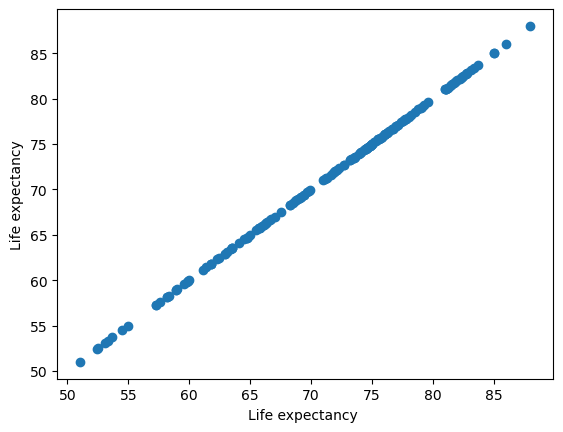

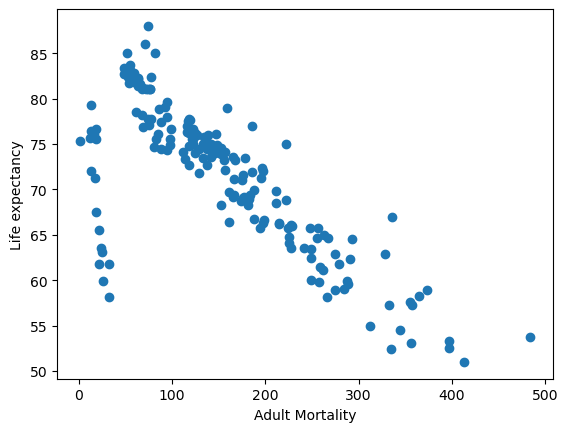

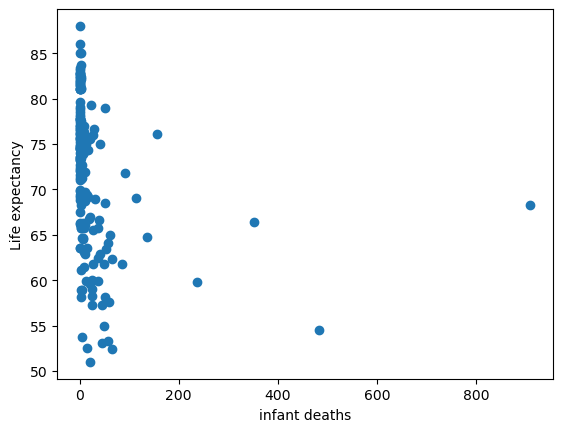

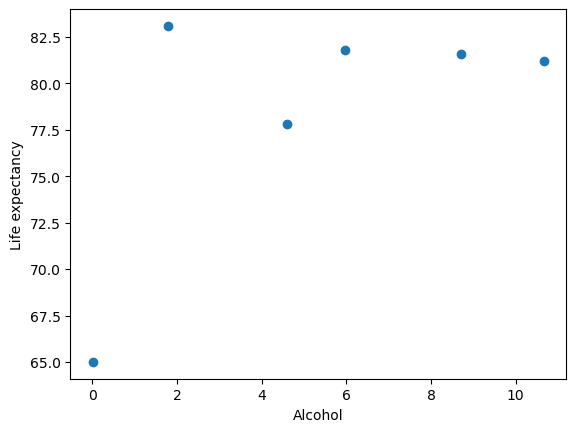

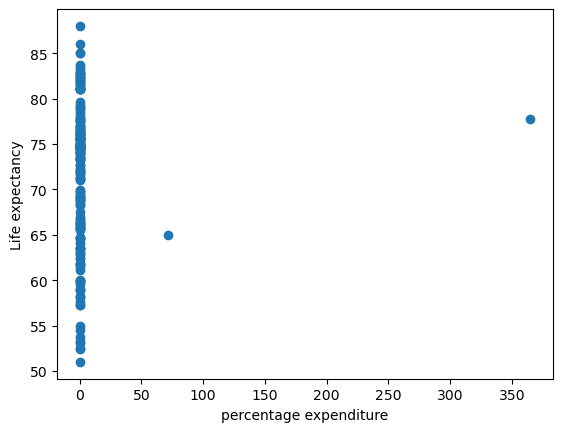

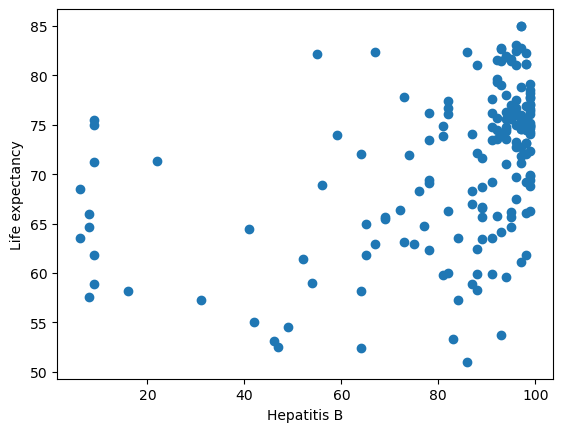

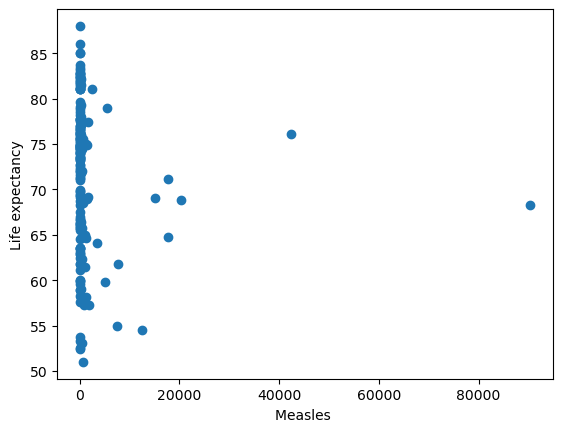

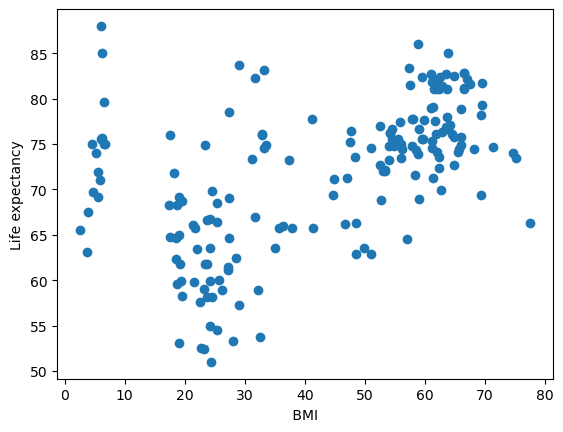

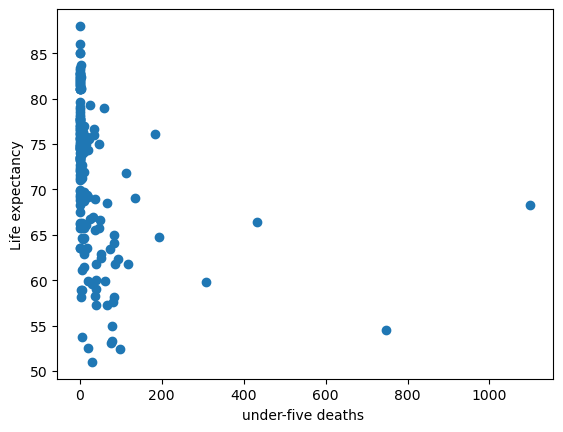

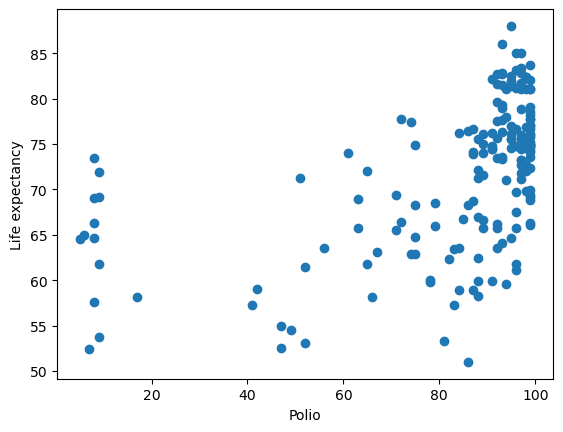

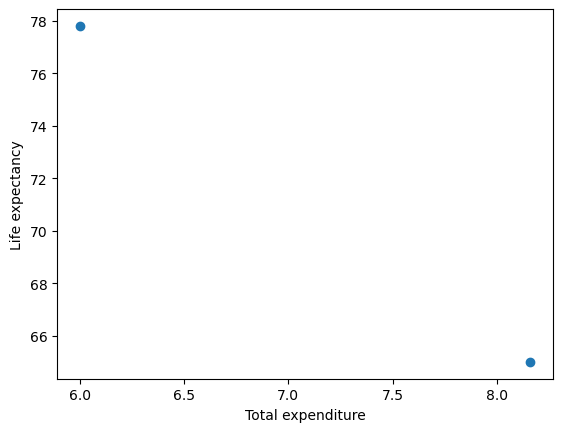

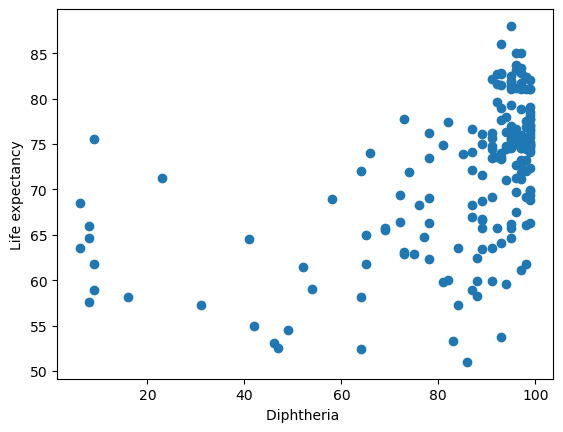

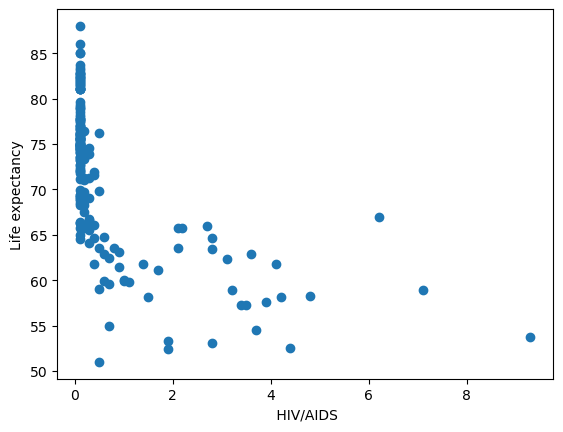

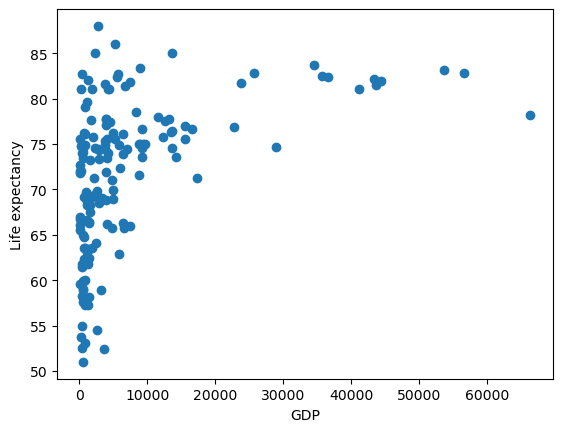

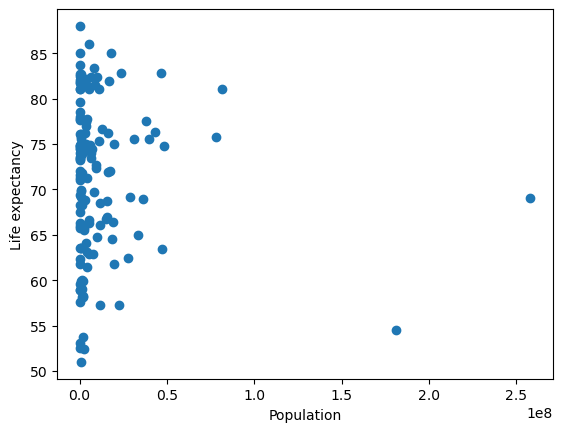

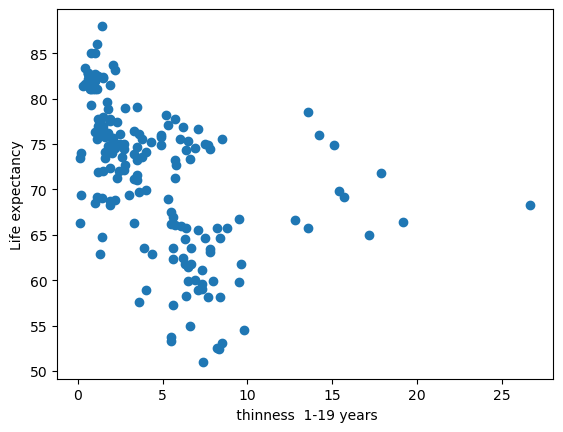

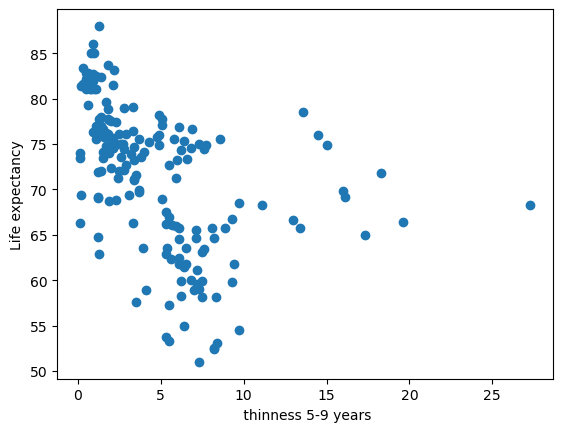

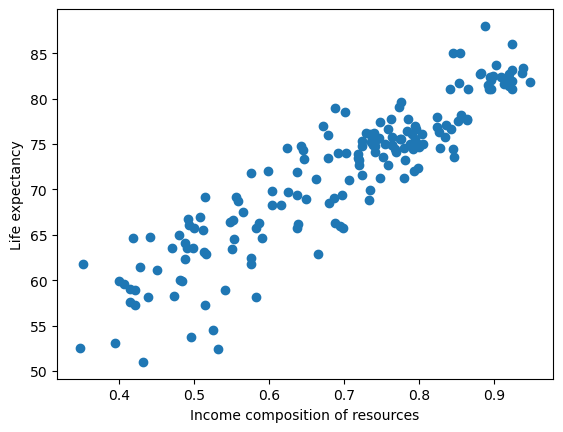

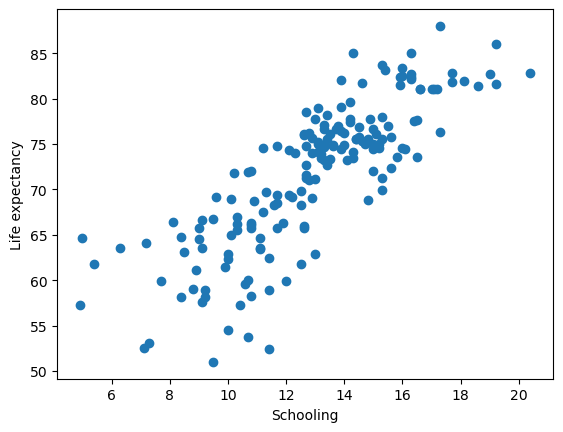

In [27]:
for col in df.columns:
    plt.scatter(df[col], df['Life expectancy '])
    plt.xlabel(col)
    plt.ylabel("Life expectancy")
    plt.show()

split into training and test data

## Splitting the data into testing and training test sets

In [28]:
# df.sample(..) allows for a random sample of the entire dataset to be returned
# np.split splits that array into an approx 60/40 split between train and test

train, test = np.split(df.sample(frac = 1), [int(0.6 * len(df))])

#Clean data of nan values

# getxy(..) allows for any x labels to be fed into the model, and a y label and the data is split into np arrays

def getxy(df, x_labels, y_label):
    
    if len(x_labels) == 1:
        
        df[x_labels[0]] = df[x_labels[0]].fillna(df[x_labels[0]].mean()) # fill any nan values with mean value -> could use linear interpolation        
        x = df[x_labels[0]].values.reshape((-1,1)) # reshape to 2d array
              
    else:
        for col in x_labels: # loop through each col and fill with mean 
            df[col] = df[col].fillna(df[x_labels[0]].mean())
            
        x = df[x_labels].values
        
    y = df[y_label].values.reshape((-1,1)) # Reshape y to 2d
    
    return x, y

x_train,y_train = getxy(train, ["Schooling"], "Life expectancy ")
x_test,y_test = getxy(test, ["Schooling"], "Life expectancy ")


In [29]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

## Output the 10 values of the training model to give an idea of how close the results are

## Output the MAE

In [30]:
for i in range(10):
    print(f'Prediction: {linear_model.predict([x_test[i]])[0][0]}, Actual {y_test[i][0]}')
print(f'Mean absolute error: {mean_absolute_error(y_test, linear_model.predict(x_test))}')

Prediction: 84.46310273379612, Actual 82.7
Prediction: 74.82429177400206, Actual 76.9
Prediction: 80.17918675166543, Actual 81.1
Prediction: 80.39338255077197, Actual 81.0
Prediction: 76.75205396596087, Actual 83.1
Prediction: 62.82932702403612, Actual 61.1
Prediction: 74.395900175789, Actual 73.5
Prediction: 70.96876739008444, Actual 71.6
Prediction: 72.25394218472364, Actual 74.7
Prediction: 81.67855734541118, Actual 81.8
Mean absolute error: 3.9927696001892583


## Plot training vs test

2023-02-19 13:16:05.017732: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


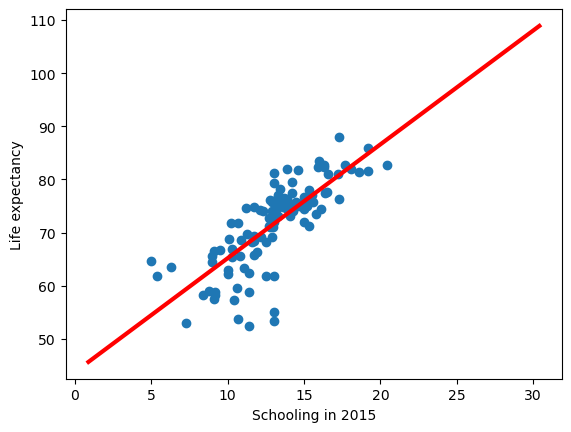

In [31]:
plt.scatter(x_train, y_train)
plt.xlabel("Schooling in 2015")
plt.ylabel("Life expectancy")

x = tf.linspace(df['Schooling'].min() - 4, df['Schooling'].max() + 10, 100) 

plt.plot(x, linear_model.predict(np.array(x).reshape((-1,1))), color = 'Red', linewidth = 3) # plot the predict line